In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px


pio.renderers.default = 'iframe_connected'

# Load cleaned dataset
df = pd.read_csv('../../data/clean/video_game_sales_final_cleaned.csv')

# Basic info
df.info()
df.describe()

# Check nulls again
print(df.isnull().sum())

# Preview
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59380 entries, 0 to 59379
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             59379 non-null  object 
 1   platform         59380 non-null  object 
 2   year_of_release  59380 non-null  int64  
 3   genre            59379 non-null  object 
 4   publisher        59380 non-null  object 
 5   na_sales         59380 non-null  float64
 6   eu_sales         59380 non-null  float64
 7   jp_sales         59380 non-null  float64
 8   other_sales      59380 non-null  float64
 9   global_sales     59380 non-null  float64
 10  rating           59380 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 5.0+ MB
name               1
platform           0
year_of_release    0
genre              1
publisher          0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
global_sales       0
rating             0


,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,rating
0,wii sports,WII,2006,sports,Nintendo,41.36,28.96,3.77,8.45,82.53,Children
1,super mario bros,NES,1985,platform,Nintendo,29.08,3.58,6.81,0.77,40.24,Unrated
2,mario kart wii,WII,2008,racing,Nintendo,15.68,12.76,3.79,3.29,35.52,Children
3,wii sports resort,WII,2009,sports,Nintendo,15.61,10.93,3.28,2.95,32.77,Children
4,pokemon redpokemon blue,GB,1996,role-playing,Nintendo,11.27,8.89,10.22,1.00,31.37,Unrated


In [2]:
!pip install -U kaleido


In [3]:
df['genre'].value_counts()


genre
action          11107
other            7334
sports           5526
adventure        5398
shooter          4873
rpg              4001
strategy         3406
puzzle           3243
racing           3231
simulation       2909
platformer       2735
misc             1721
role-playing     1483
platform          878
fighting          837
visual novel      322
music             163
party              84
mmo                74
board game         22
education          17
sandbox            15
Name: count, dtype: int64

## Dataset Overview

###  General Info:
- **Total entries**: 59,379  
- **Columns**: 13  
- **Data types**: 5 floats, 1 integer, 7 objects  
- **Memory usage**: ~5.9 MB  

---

###  Key Columns:
- `name`, `platform`, `genre`, `publisher`, `rating`, `rating_grouped` → *Categorical*
- `na_sales`, `eu_sales`, `jp_sales`, `other_sales`, `global_sales` → *Continuous numeric (float)*
- `year_of_release` → *Numeric (but represents time)*

---

###  Missing Values:
- `rating` and `rating_grouped`: Only ~16,447 non-null values → **significant missing data**
- All other columns are fully populated

---

###  Duplicates:
- Consider checking with `df.duplicated().sum()`
- The `name_clean` column may help identify re-releases or duplicates

---

###  Top Observations:
- **Most repeated game**: `doom` (16 times) — likely due to re-releases on multiple platforms
- **Most common publisher**: `Sega` with 2,326 titles
- **Sales skew**: Most games sold **very little**  
  - Mean of `global_sales`: ~0.17 million units  
  - Max value: **82.5 million units**
- Distribution is **highly right-skewed**


In [4]:
print(f'Duplicated rows: {df.duplicated().sum()}')


Duplicated rows: 0


In [5]:
df['year_of_release'] = df['year_of_release'].astype(int)


In [6]:
filtered_df = df[df['global_sales'] < 1]

fig = px.histogram(
    filtered_df,
    x='global_sales',
    nbins=40,
    title="What's the typical sales range for most games?",
    color_discrete_sequence=['indianred']
)

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Number of Games',
    template='simple_white',
    title_x=0.5
)

fig.show()


In [7]:
platform_sales = (
    df.groupby('platform', as_index=False)['global_sales']
    .sum()
    .query('global_sales > 100')  
    .sort_values(by='global_sales', ascending=False)
)

fig = px.bar(
    platform_sales,
    x='global_sales',
    y='platform',
    orientation='h',
    title='Which consoles dominate global sales?',
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_layout(
    xaxis_title='global sales (millions)',
    yaxis_title='platform',
    title_x=0.5,
    template='simple_white',
    showlegend=False
)

fig.show()

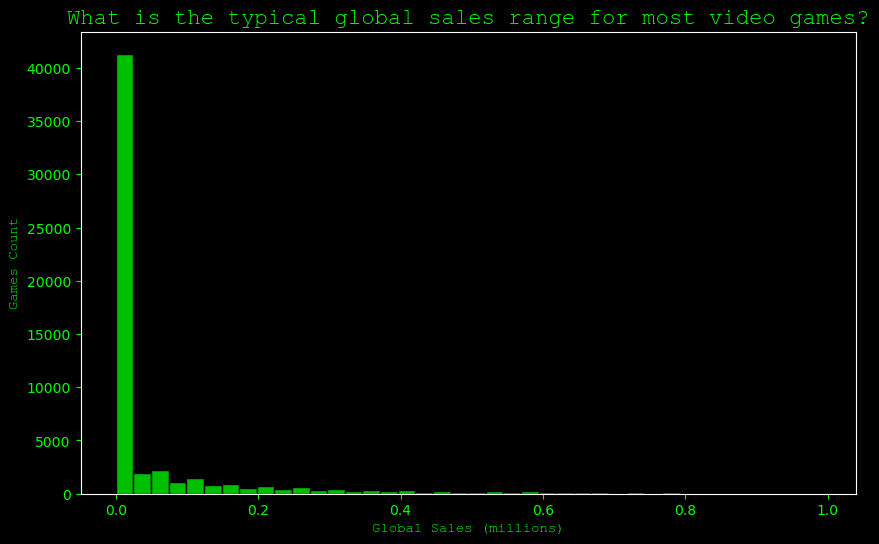

In [8]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

filtered_df = df[df['global_sales'] < 1]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['global_sales'], bins=40, color='#00FF00', edgecolor='black')

plt.title("What is the typical global sales range for most video games?", fontname='Courier New', fontsize=16, color='#00FF00')
plt.xlabel("Global Sales (millions)", fontname='Courier New', color='#00FF00')
plt.ylabel("Games Count", fontname='Courier New', color='#00FF00')
plt.tick_params(colors='#00FF00')
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\sales_distribution_under_1M.png",
    transparent=True
)

plt.show()


## Most games sell fewer than 1 million copies, with the majority clustered below 200,000.
This supports using 1M units as a threshold for defining a blockbuster hit.

In [9]:
platform_sales = df.groupby('platform', as_index=False)['global_sales'].sum()

platform_sales = platform_sales[platform_sales['global_sales'] > 100]

platform_sales = platform_sales.sort_values(by='global_sales', ascending=False)

fig = px.bar(
    platform_sales,
    x='global_sales',
    y='platform',
    orientation='h',
    title='Which consoles dominate global sales?',
    color_discrete_sequence=['indianred']  # Color uniforme
)

fig.update_layout(
    xaxis_title='Global Sales (millions)',
    yaxis_title='Platform',
    title_x=0.5,
    template='simple_white',
    width=1000,
    height=600,
    showlegend=False
)

fig.show()

In [10]:
genre_sales = (
    df.groupby('genre', as_index=False)['global_sales']
    .sum()
    .sort_values(by='global_sales', ascending=False)
)

top_genres = genre_sales.head(10)

fig = px.bar(
    top_genres,
    x='genre',
    y='global_sales',
    title='Which genres are the most profitable?',
    color='genre',
    color_discrete_sequence=px.colors.qualitative.Pastel,
    text='global_sales'
)

fig.update_traces(
    texttemplate='%{text:.1f}',
    textposition='outside'
)

fig.update_layout(
    xaxis_tickangle=-40,
    title_x=0.5
)

fig.show()



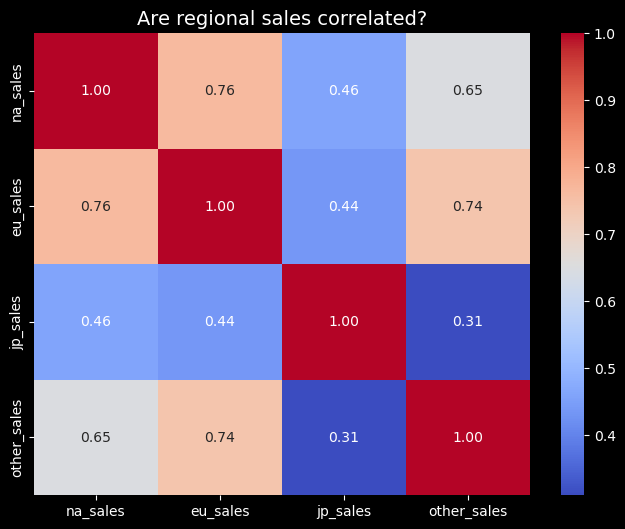

In [11]:
region_sales = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]

correlation_matrix = region_sales.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Are regional sales correlated?", fontsize=14)
plt.show()

Sales in North America and Europe are strongly correlated, indicating similar market trends. However, Japan consistently shows low correlation with other regions, suggesting a distinct gaming culture and preferences.

In [12]:
top_publishers = (
    df.groupby('publisher', as_index=False)['global_sales']
    .sum()
    .sort_values(by='global_sales', ascending=False)
    .head(10)
)

fig = px.bar(
    top_publishers,
    x='publisher',
    y='global_sales',
    color='publisher',
    title="Who are the top-selling publishers?",
    text='global_sales',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig.update_traces(texttemplate='%{text:.1f}', textposition='outside')
fig.update_layout(
    xaxis_title='Publisher',
    yaxis_title='Global Sales (millions)',
    title_x=0.5,
    template='simple_white',
    showlegend=False
)

fig.show()

NameError: name 'path_effects' is not defined

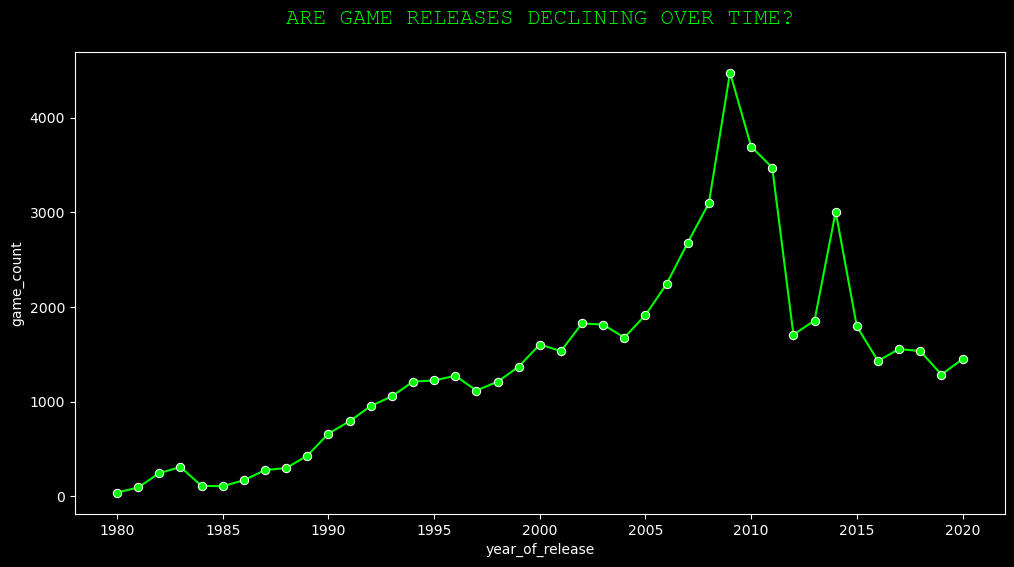

In [13]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

yearly_releases = (
    df.groupby('year_of_release', as_index=False)
    .agg(game_count=('name', 'count'))
    .query("year_of_release <= 2020")
    .sort_values(by='year_of_release')
)

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=yearly_releases, x='year_of_release', y='game_count', marker='o', color='#00FF00')

title = plt.title("ARE GAME RELEASES DECLINING OVER TIME?", fontsize=16, fontname='Courier New', color='#00FF00', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.xlabel("Year of Release", fontsize=12, fontname='Courier New', color='#00FF00')
plt.ylabel("Number of Games Released", fontsize=12, fontname='Courier New', color='#00FF00')
plt.xticks(color='#00FF00', rotation=45)
plt.yticks(color='#00FF00')
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\game_releases_over_time.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show

The video game industry evolved from an era of explosive growth in releases to a more selective and mature phase. Today, fewer titles are launched, but they tend to be higher-budget and longer in scope.

Notably, the sharp decline in game releases after 2019 may also reflect the effects of the COVID-19 pandemic, which disrupted production pipelines, delayed launches, and shifted development workflows across the industry.

NameError: name 'path_effects' is not defined

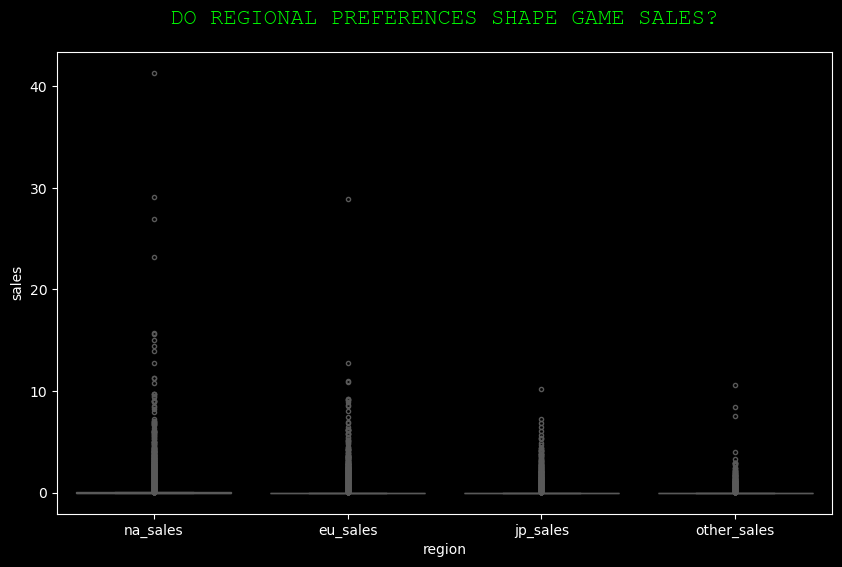

In [14]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

region_sales_long = df.melt(
    value_vars=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'],
    var_name='region',
    value_name='sales'
)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=region_sales_long,
    x='region',
    y='sales',
    hue='region',
    palette='Set2',
    linewidth=1,
    fliersize=3,
    legend=False
)

title = plt.title("DO REGIONAL PREFERENCES SHAPE GAME SALES?", fontsize=16, color='#00FF00', fontname='Courier New', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.xlabel("Region", fontsize=12, color='#00FF00', fontname='Courier New')
plt.ylabel("Sales (millions)", fontsize=12, color='#00FF00', fontname='Courier New')

plt.xticks(color='#00FF00', fontname='Courier New')
plt.yticks(color='#00FF00')
plt.grid(False)

plt.tight_layout()
plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\boxplot_sales_by_region.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()

North America and Europe lead in game sales, with higher medians and more outliers. Japan shows lower sales and tighter distribution, while other regions contribute the least. 

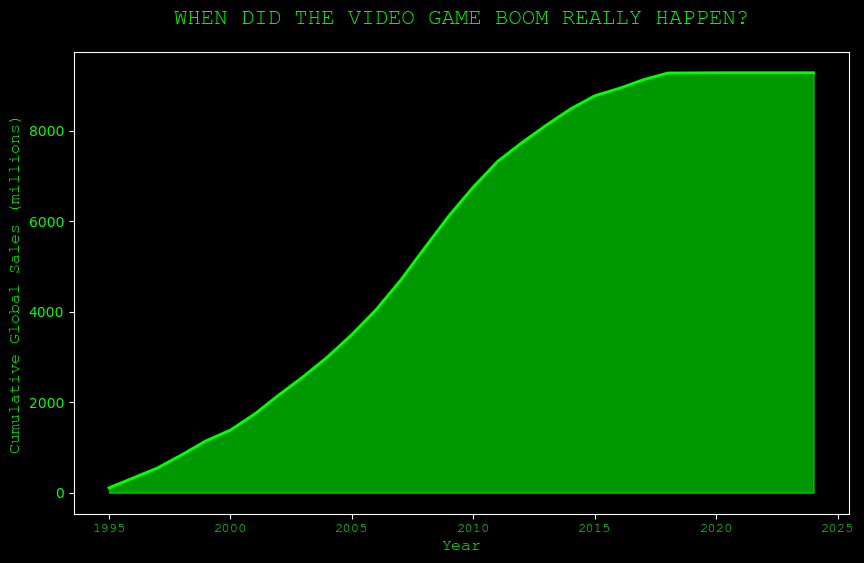

In [15]:
year_sales = (
    df.groupby('year_of_release', as_index=False)['global_sales']
    .sum()
    .sort_values(by='year_of_release')
)

all_years = pd.DataFrame({'year_of_release': range(1995, 2025)})
year_sales = pd.merge(all_years, year_sales, on='year_of_release', how='left')
year_sales['global_sales'] = year_sales['global_sales'].fillna(0)
year_sales['cumulative_sales'] = year_sales['global_sales'].cumsum()

plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

plt.fill_between(
    year_sales['year_of_release'],
    year_sales['cumulative_sales'],
    color='#00FF00',
    alpha=0.6
)

plt.plot(
    year_sales['year_of_release'],
    year_sales['cumulative_sales'],
    color='#00FF00',
    linewidth=2
)

plt.title("WHEN DID THE VIDEO GAME BOOM REALLY HAPPEN?", fontsize=16, fontname='Courier New', color='#00FF00', pad=20)
plt.xlabel("Year", fontsize=12, fontname='Courier New', color='#00FF00')
plt.ylabel("Cumulative Global Sales (millions)", fontsize=12, fontname='Courier New', color='#00FF00')

plt.xticks(color='#00FF00', fontname='Courier New')
plt.yticks(color='#00FF00')
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\cumulative_sales_area.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()

### When Did the Video Game Boom Really Happen?

This area chart displays the cumulative global video game sales from 1995 to 2024. 

We observe a significant upward trend starting in the early 2000s, with the sharpest growth occurring between 2005 and 2015. This suggests that the "video game boom" largely took place during this decade, coinciding with the rise of consoles like the PlayStation 2, Wii, Xbox 360, and Nintendo DS.

After 2016, the curve plateaus due to the lack of data in the original dataset, not necessarily a drop in real-world sales. For this reason, any post-2016 interpretation should be made cautiously or supplemented with external data if needed.


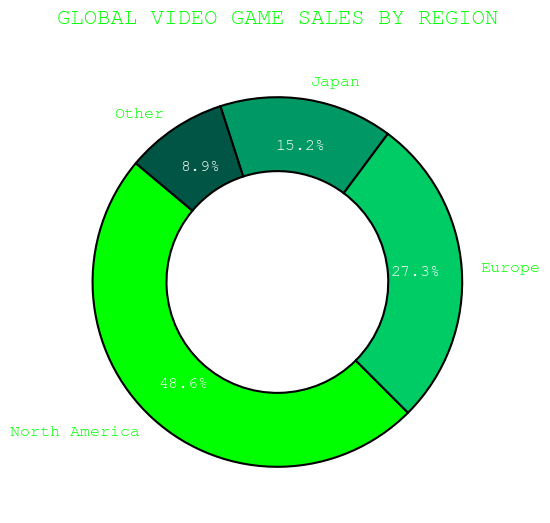

In [16]:
import matplotlib.pyplot as plt

region_totals = {
    'North America': df['na_sales'].sum(),
    'Europe': df['eu_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}

labels = list(region_totals.keys())
sizes = list(region_totals.values())
colors = ['#00FF00', '#00CC66', '#009966', '#005544']

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(8, 6))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops=dict(color='white', fontsize=12, fontname='Courier New'),
    wedgeprops=dict(width=0.4, edgecolor='black', linewidth=1.5),
    pctdistance=0.75,
    labeldistance=1.1
)

ax.set_title("GLOBAL VIDEO GAME SALES BY REGION", fontsize=16, fontname='Courier New', color='#00FF00', pad=20)
ax.set_facecolor('black')
fig.patch.set_alpha(0)

for text in texts:
    text.set_color('#00FF00')
    text.set_fontname('Courier New')
    text.set_fontsize(12)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\donut_sales_by_region.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()


## Who Really Drives Global Video Game Sales?

This donut chart shows the share of global video game sales by region. The data reveals that **North America accounts for nearly half (48.6%)** of total sales, followed by **Europe (27.3%)**. Together, these two markets dominate the global video game industry.

**Japan**, while historically influential in game development and IPs, contributes a smaller portion (15.2%) of the global sales. The remaining 8.9% is distributed across other regions.

These findings highlight the importance of targeting North American and European audiences when developing or marketing high-performing titles.


NameError: name 'path_effects' is not defined

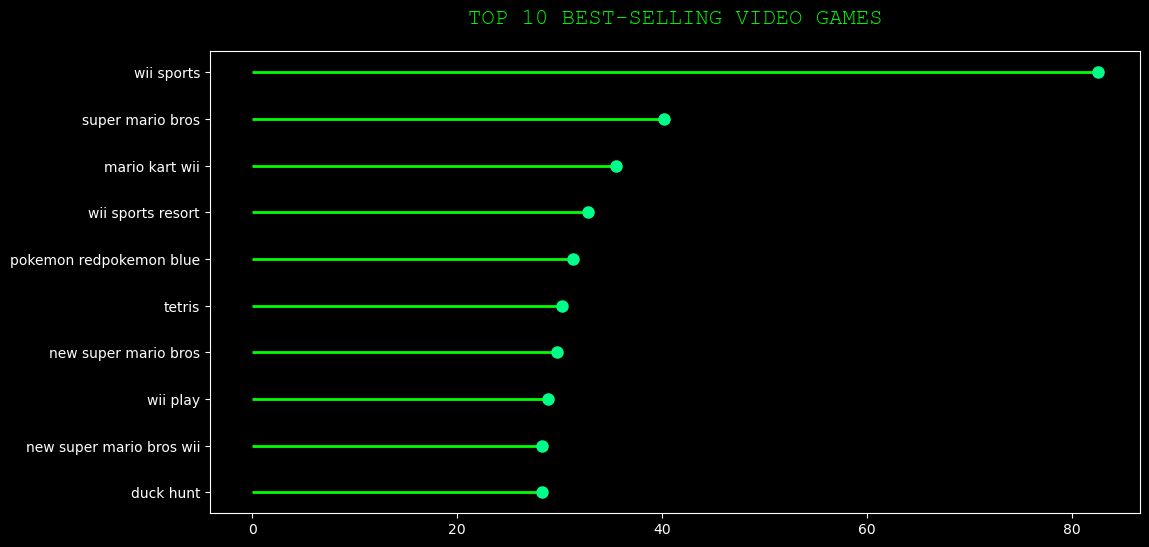

In [17]:
plt.style.use('dark_background')

top_games = df[['name', 'global_sales']].sort_values(by='global_sales', ascending=True).tail(10)

plt.figure(figsize=(12, 6))


plt.hlines(y=top_games['name'], xmin=0, xmax=top_games['global_sales'], color='#00FF00', linewidth=2)

plt.plot(top_games['global_sales'], top_games['name'], 'o', color='#00FF88', markersize=8)

title = plt.title("TOP 10 BEST-SELLING VIDEO GAMES", fontsize=16, color='#00FF00', fontname='Courier New', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.xlabel("Global Sales (millions)", fontsize=12, color='#00FF00', fontname='Courier New')
plt.ylabel("Game Title", fontsize=12, color='#00FF00', fontname='Courier New')

plt.xticks(color='#00FF00')
plt.yticks(color='#00FF00')
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\lollipop_top10_games.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()



## Top 10 Best-Selling Video Games of All Time

This chart highlights the top 10 best-selling video games globally, showing a clear dominance of Nintendo titles.

**Wii Sports** stands out as the clear leader, with over 80 million copies sold, followed by *Mario Kart Wii* and *Wii Sports Resort*. Most of these titles were released on Nintendo platforms like the Wii or DS, emphasizing the company’s strong hold on the casual and family gaming market during the 2000s.

The presence of multiple Pokémon and Mario titles further underlines Nintendo’s franchise power, with broad international appeal and long-term brand loyalty.

These insights confirm that platform exclusives and family-oriented titles have historically outperformed more niche or genre-specific games in total unit sales.


In [18]:
top_platforms = df.groupby('platform', as_index=False)['global_sales'].sum()
top_10_platforms = top_platforms.sort_values(by='global_sales', ascending=False).head(10)['platform']

filtered_df = df[df['platform'].isin(top_10_platforms)]

top_per_platform = filtered_df.sort_values('global_sales', ascending=False).drop_duplicates('platform')

fig = px.treemap(
    top_per_platform,
    path=['platform', 'name'],
    values='global_sales',
    title="Which game leads the Top 10 platforms?",
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set3
)
fig.update_layout(title_x=0.5)
fig.show()

In [19]:
## import plotly.express as px

# Filter games released from 2015 onwards
recent = df[df['year_of_release'] >= 2015]

# Get top 4 platforms by total global sales in that period
top_recent_platforms = (
    recent.groupby('platform')['global_sales']
    .sum()
    .sort_values(ascending=False)
    .head(4)
    .index
)

# Filter games only from those top platforms
subset = recent[recent['platform'].isin(top_recent_platforms)]

# Get top 6 games per platform
top_games = (
    subset.groupby(['platform', 'name'], as_index=False)['global_sales']
    .sum()
    .sort_values(['platform', 'global_sales'], ascending=[True, False])
    .groupby('platform')
    .head(6)
)

# Create treemap
fig = px.treemap(
    top_games,
    path=['platform', 'name'],
    values='global_sales',
    title='What are the most played games on recent platforms?',
    color='platform',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(title_x=0.5)
fig.show()



> **Disclaimer:** This dataset focuses on physical sales and excludes most digital distribution.  
> Recent platforms and PC games may be underrepresented. 


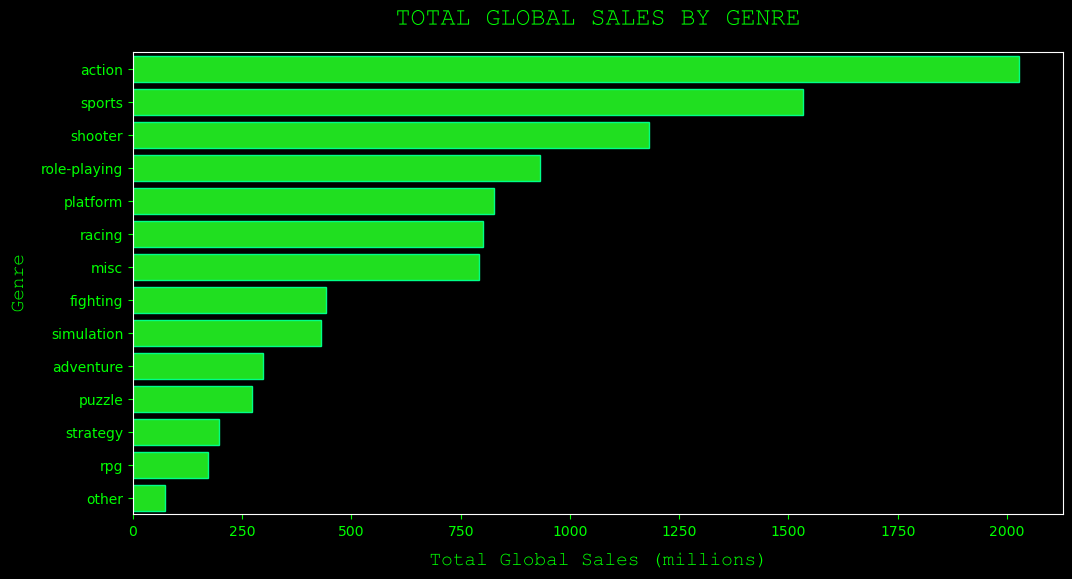

In [20]:
import matplotlib.patheffects as path_effects

plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

genre_sales = df.groupby('genre')['global_sales'].sum().sort_values(ascending=False).reset_index()

cut_index = genre_sales[genre_sales['genre'] == 'other'].index[0] + 1
filtered_genre_sales = genre_sales.iloc[:cut_index]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_genre_sales, x='global_sales', y='genre', color='#00FF00', edgecolor='#00FF88')

title = plt.title("TOTAL GLOBAL SALES BY GENRE", fontname='Courier New', fontsize=18, color='#00FF00', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])


xlabel = plt.xlabel("Total Global Sales (millions)", fontname='Courier New', fontsize=14, color='#00FF00', labelpad=10)
xlabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])

ylabel = plt.ylabel("Genre", fontname='Courier New', fontsize=14, color='#00FF00', labelpad=10)
ylabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])

plt.tick_params(colors='#00FF00', labelsize=10)
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\total_global_sales_by_genre_filtered.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()


### Genre Matters: Where the Big Money Is

Not all games are created equal — some genres drive the majority of revenue.

As seen in the chart, **Action, Sports, and Shooter** games lead the market, outperforming others by a wide margin.

If you're planning the next gaming blockbuster, these genres are statistically your best bet.

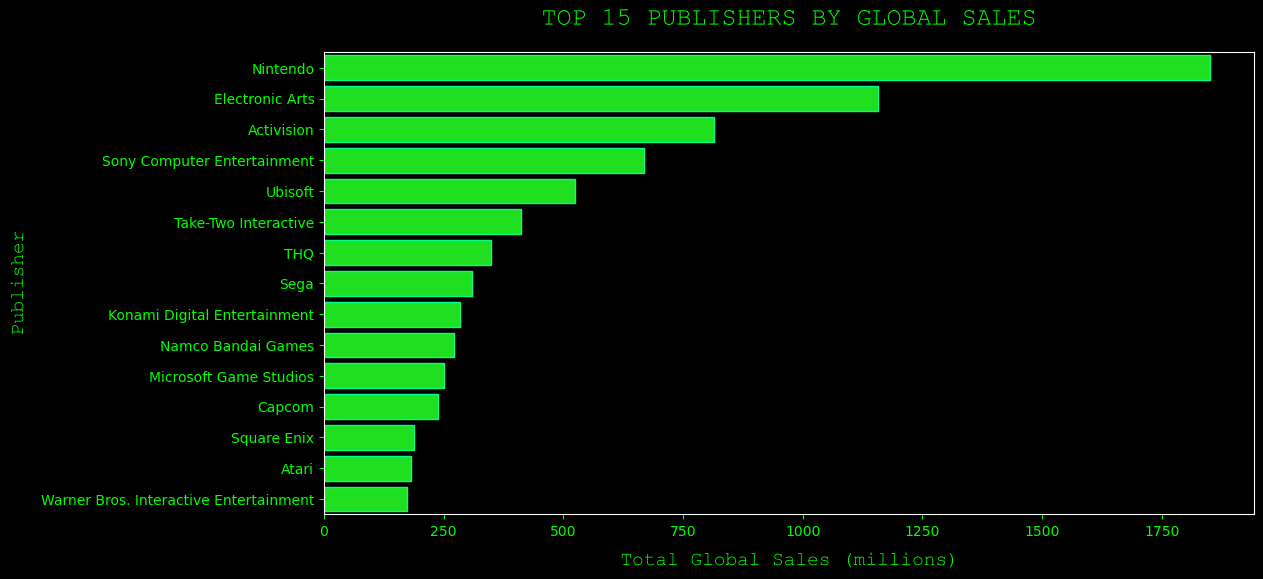

In [21]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

publisher_sales = df.groupby('publisher')['global_sales'].sum().sort_values(ascending=False).head(15).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=publisher_sales, x='global_sales', y='publisher', color='#00FF00', edgecolor='#00FF88')

title = plt.title("TOP 15 PUBLISHERS BY GLOBAL SALES", fontname='Courier New', fontsize=18, color='#00FF00', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

xlabel = plt.xlabel("Total Global Sales (millions)", fontname='Courier New', fontsize=14, color='#00FF00', labelpad=10)
xlabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])
ylabel = plt.ylabel("Publisher", fontname='Courier New', fontsize=14, color='#00FF00', labelpad=10)
ylabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])

plt.tick_params(colors='#00FF00', labelsize=10)
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\top_15_publishers_by_sales.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()

### Top Publishers by Global Sales

Nintendo dominates the market, followed by EA, Activision, and Sony.

These publishers have consistently released best-selling titles, shaping the industry's revenue over time.


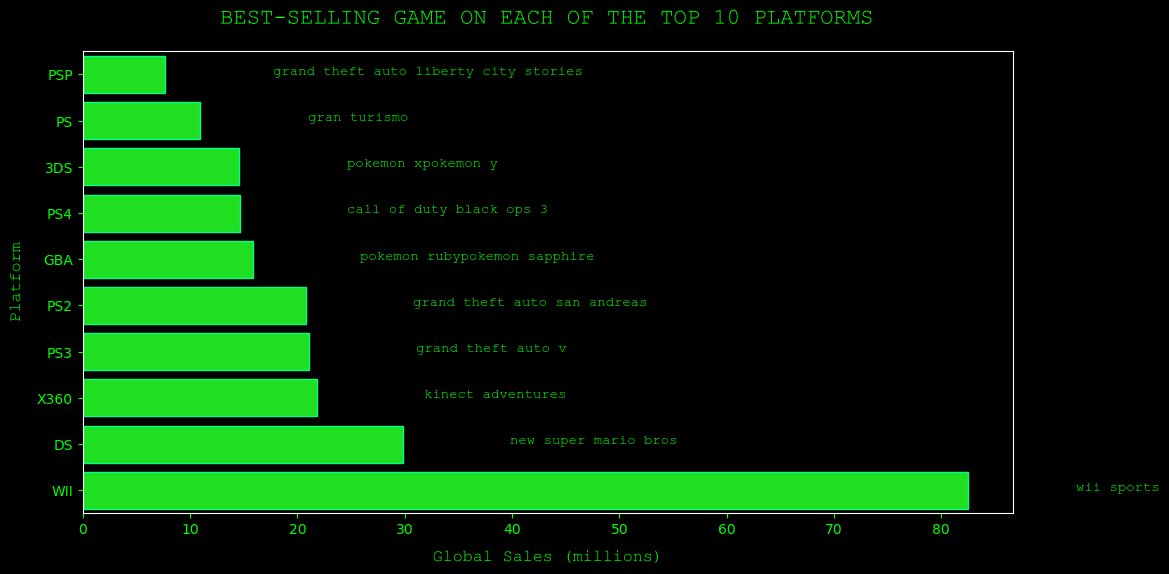

In [22]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

top_platforms = df.groupby('platform')['global_sales'].sum().sort_values(ascending=False).head(10).index
filtered_df = df[df['platform'].isin(top_platforms)]
top_games = filtered_df.loc[filtered_df.groupby('platform')['global_sales'].idxmax()]
top_games = top_games.sort_values(by='global_sales', ascending=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_games, x='global_sales', y='platform', color='#00FF00', edgecolor='#00FF88')

for index, row in top_games.iterrows():
    plt.text(row['global_sales'] + 10, row['platform'], row['name'], color='#00FF00', fontname='Courier New', fontsize=10)

title = plt.title("BEST-SELLING GAME ON EACH OF THE TOP 10 PLATFORMS", fontname='Courier New', fontsize=16, color='#00FF00', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

xlabel = plt.xlabel("Global Sales (millions)", fontname='Courier New', fontsize=12, color='#00FF00', labelpad=10)
xlabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])
ylabel = plt.ylabel("Platform", fontname='Courier New', fontsize=12, color='#00FF00', labelpad=10)
ylabel.set_path_effects([path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()])

plt.tick_params(colors='#00FF00', labelsize=10)
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\best_selling_game_top10_platforms.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()

## Some platforms owe much of their success to a single title.

This chart highlights the best-selling game on each of the top 10 platforms by total sales, showing how iconic releases like Wii Sports or Grand Theft Auto V helped define their systems.


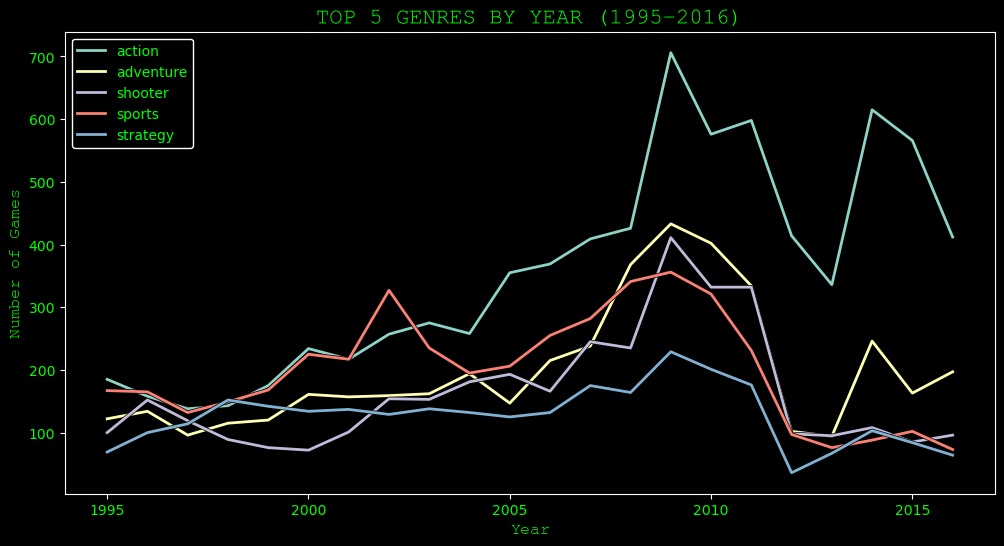

In [23]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

df = df[df['year_of_release'].between(1995, 2016)]
df = df[df['genre'].notna()]

df = df[~df['genre'].isin(['other', 'platformer', 'rpg'])]

# Identificar los 5 géneros más frecuentes
top_genres = (
    df['genre'].value_counts()
    .head(5)
    .index
)

filtered = df[df['genre'].isin(top_genres)]

genre_trend = (
    filtered.groupby(['year_of_release', 'genre'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 6))
for genre in genre_trend.columns:
    line = plt.plot(genre_trend.index, genre_trend[genre], label=genre, linewidth=2)
    line[0].set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])

title = plt.title("TOP 5 GENRES BY YEAR (1995–2016)", fontname='Courier New', fontsize=16, color='#00FF00')
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.xlabel("Year", fontname='Courier New', fontsize=12, color='#00FF00')
plt.ylabel("Number of Games", fontname='Courier New', fontsize=12, color='#00FF00')
plt.xticks(color='#00FF00')
plt.yticks(color='#00FF00')

legend = plt.legend(facecolor='black', framealpha=1, edgecolor='white', labelcolor='#00FF00', fontsize=10)
for text in legend.get_texts():
    text.set_color('#00FF00')

plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\line_top5_genres_cleaned.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()


This chart shows how game release trends have evolved across the most popular genres.

We limited the data to the years 1995–2016 to ensure accuracy and consistency. After 2016, the dataset becomes sparse and incomplete, which could misrepresent the actual market behavior in recent years.

Notably, action and shooter games dominated the industry during the late 2000s and early 2010s, reflecting player preferences and technological shifts of the time.


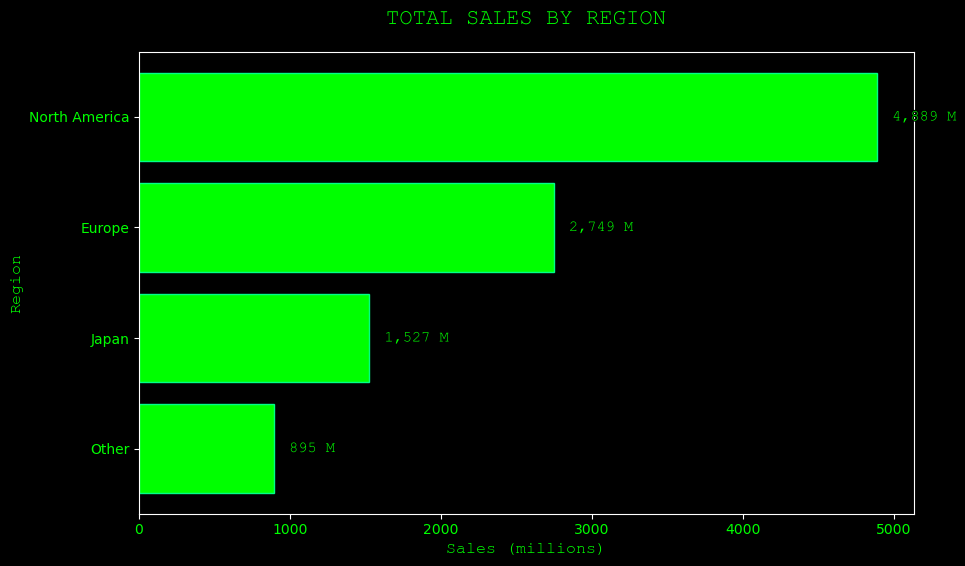

In [24]:
plt.style.use('dark_background')

df = pd.read_csv(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\data\clean\video_game_sales_final_cleaned.csv"
)

region_totals = {
    'North America': df['na_sales'].sum(),
    'Europe': df['eu_sales'].sum(),
    'Japan': df['jp_sales'].sum(),
    'Other': df['other_sales'].sum()
}

region_df = pd.DataFrame(region_totals.items(), columns=['Region', 'Total Sales'])
region_df = region_df.sort_values(by='Total Sales', ascending=True)

plt.figure(figsize=(10, 6))
bars = plt.barh(
    region_df['Region'],
    region_df['Total Sales'],
    color='#00FF00',
    edgecolor='#00FF88'
)

for bar in bars:
    value = bar.get_width()
    label = f"{value:,.0f} M"
    plt.text(
        value + 100,  # separación derecha
        bar.get_y() + bar.get_height() / 2,
        label,
        va='center',
        ha='left',
        fontsize=11,
        fontname='Courier New',
        color='#00FF00',
        path_effects=[path_effects.Stroke(linewidth=1.5, foreground='black'), path_effects.Normal()]
    )

title = plt.title("TOTAL SALES BY REGION", fontname='Courier New', fontsize=16, color='#00FF00', pad=20)
title.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Normal()])

plt.xlabel("Sales (millions)", fontname='Courier New', fontsize=12, color='#00FF00')
plt.ylabel("Region", fontname='Courier New', fontsize=12, color='#00FF00')

plt.xticks(color='#00FF00')
plt.yticks(color='#00FF00')
plt.grid(False)

plt.savefig(
    r"C:\Users\PcVIP\Desktop\Bootcamp\Week7\Weekly_project_ml\video_game_sales\presentations\graphs\total_sales_by_region_refined.png",
    transparent=True,
    bbox_inches='tight',
    facecolor='none'
)

plt.show()

This chart compares total video game sales across the four main global regions.

North America leads the market with nearly 4.9 billion units sold, followed by Europe with around 2.7 billion. Japan, despite its rich gaming culture, comes third with 1.5 billion units. The "Other" category includes regions such as South America, Oceania, and parts of Asia outside Japan, contributing around 895 million in total sales.

This distribution highlights the dominance of Western markets in global sales, suggesting a strong alignment between game production and consumption in North America and Europe.


## Further Findings

One of the most notable patterns we observed is the sharp rise and fall in the number of game releases over time. Between 1995 and 2009, annual game releases grew steadily, peaking around 2010–2011. Since then, there's been a visible decline in the number of titles released per year.

This trend may be linked to the industry’s shift toward higher production values, fewer releases per publisher, and the rise of mobile and digital-first platforms outside the scope of this dataset.

Despite the drop in total releases, **the average sales per game remained relatively stable for certain rating groups**, especially for “Teen” and “Everyone”-rated titles.

These insights suggest a transition toward quality-over-quantity and a growing focus on well-targeted audiences.


## Conclusions & Business Recommendations

This analysis reveals that the video game market is highly concentrated, both in terms of sales and production trends:

- A small number of publishers (e.g., Nintendo, EA, Activision) dominate total global sales.
- Most games sell fewer than 1 million copies, reinforcing the idea that blockbuster hits are rare.
- Action, sports, and shooter genres generate the highest revenues, while “Teen” and “Everyone” ratings tend to yield stronger average sales.
- Game releases peaked between 2009–2011 and have since declined, suggesting a shift toward fewer but more polished releases.

**Recommendations for publishers and developers:**
- Prioritize game genres and rating groups with proven commercial performance (e.g., Action/Teen).
- Focus on platforms and regions with strong market share — especially North America and Europe.
- Invest in fewer, higher-quality titles with mass-market appeal, rather than flooding the market.

Understanding these patterns helps inform data-driven strategies for production, marketing, and platform targeting.
